Step 1: Data Collection & Loading :

In [9]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('ifood_df.csv')
df.head()

# Display first few rows
print("Shape of dataset:", df.shape)
df.head()

Saving ifood_df.csv to ifood_df (1).csv
Shape of dataset: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


Step 2: Data Exploration & Cleaning

In [10]:
# Basic info
df.info()
df.describe()

# Check missing values
print("Missing values:\n", df.isnull().sum())

# If missing values exist → fill or drop (example: fill with median)
df = df.fillna(df.median())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Step 3: Descriptive Statistics

Average Purchase Value: 306.16462585034014
Frequency of Purchases: 4.100680272108844


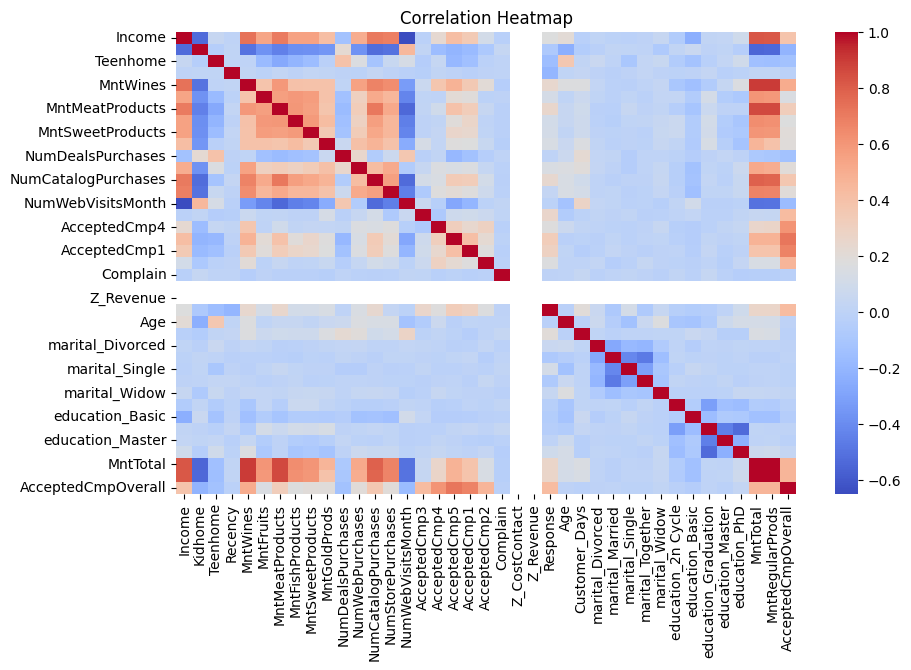

In [11]:
# Example descriptive stats
print("Average Purchase Value:", df['MntWines'].mean())
print("Frequency of Purchases:", df['NumWebPurchases'].mean())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


Step 4: Customer Segmentation (K-Means)

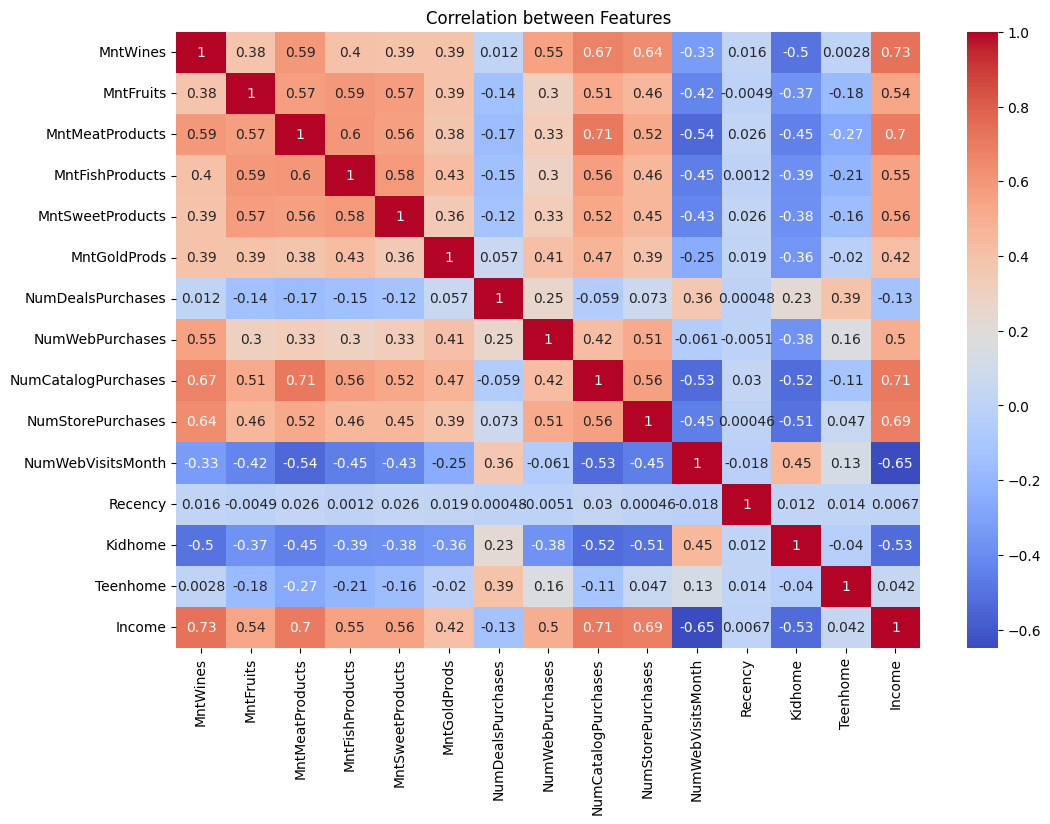

In [12]:
# Step 1: Select main features
features = df[[
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'Recency',
    'Kidhome', 'Teenhome',
    'Income'
]]

# Step 2: Check correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Features")
plt.show()


In [13]:
# Automatically drop highly correlated features
corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop columns with correlation > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Dropping highly correlated features:", to_drop)

features = features.drop(columns=to_drop)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # You can adjust n_clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

Dropping highly correlated features: []


Step 5: Visualization

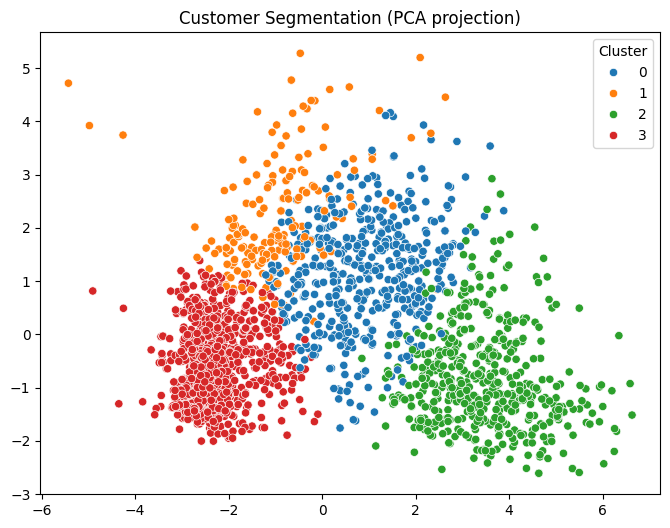

           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                            
0        506.938614  24.702970       146.338614        32.332673   
1        288.202020  11.383838       105.181818        18.055556   
2        600.784278  71.301645       457.553931       103.698355   
3         34.969634   4.699476        20.423037         6.939267   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                       
0               24.015842     61.580198           2.693069         6.190099   
1               13.712121     48.151515           6.494949         5.777778   
2               73.819013     77.992687           1.250457         5.246801   
3                4.812565     14.504712           1.865969         1.991623   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth    Recency  \
Cluster                            

In [14]:
# PCA for 2D visualization
pca = PCA(2)
pca_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='tab10')
plt.title("Customer Segmentation (PCA projection)")
plt.show()

# Average values per cluster
cluster_summary = df.groupby("Cluster")[features.columns].mean()
print(cluster_summary)


Number of customers in each cluster:
 Cluster
0    505
1    198
2    547
3    955
Name: count, dtype: int64


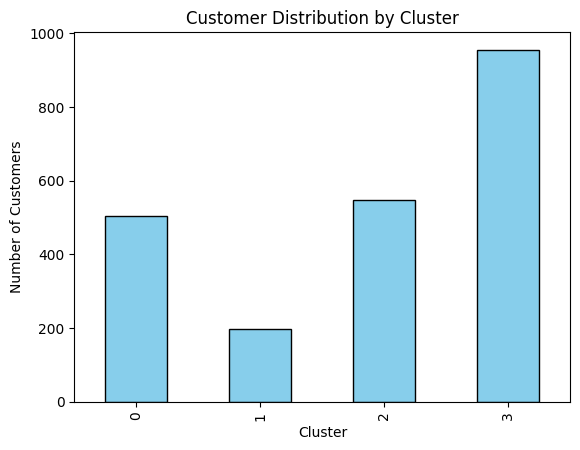

In [15]:
# Count customers per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

print("Number of customers in each cluster:\n", cluster_counts)

# Optional: make a bar chart
import matplotlib.pyplot as plt

cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Cluster")
plt.show()


Step 6: Insights & Recommendations

In [16]:
# Example: Print characteristics of each cluster
for i in range(df['Cluster'].nunique()):
    print(f"\nCluster {i} Summary:")
    print(cluster_summary.loc[i])



Cluster 0 Summary:
MntWines                 506.938614
MntFruits                 24.702970
MntMeatProducts          146.338614
MntFishProducts           32.332673
MntSweetProducts          24.015842
MntGoldProds              61.580198
NumDealsPurchases          2.693069
NumWebPurchases            6.190099
NumCatalogPurchases        3.398020
NumStorePurchases          8.075248
NumWebVisitsMonth          5.182178
Recency                   48.546535
Kidhome                    0.065347
Teenhome                   0.891089
Income                 60378.384158
Name: 0, dtype: float64

Cluster 1 Summary:
MntWines                 288.202020
MntFruits                 11.383838
MntMeatProducts          105.181818
MntFishProducts           18.055556
MntSweetProducts          13.712121
MntGoldProds              48.151515
NumDealsPurchases          6.494949
NumWebPurchases            5.777778
NumCatalogPurchases        2.070707
NumStorePurchases          5.803030
NumWebVisitsMonth          7.262626


Recommendation based on clusters:
| Cluster                 | Characteristics                            | Strategy                                  |
| ----------------------- | ------------------------------------------ | -------------------------------------------------- |
| **0 – High-Value**      | Premium customers, high spenders           | Keep them loyal with VIP offers & exclusive perks  |
| **1 – Deal Seekers**    | Discount-driven, family-focused            | Attract with bundles, coupons & family deals       |
| **2 – Online Shoppers** | Digital-first, frequent web/catalog buyers | Improve online experience & offer free shipping    |
| **3 – Dormant**         | Inactive, high recency, low spend          | Re-engage with “we miss you” campaigns & discounts |
